# Transfer Learning: Fine-tuning Bird Species Recognition Problem

In [1]:
# Getting helper functions
!wget https://raw.githubusercontent.com/edaehn/deep_learning_notebooks/main/helpers.py

--2022-04-14 10:04:10--  https://raw.githubusercontent.com/edaehn/deep_learning_notebooks/main/helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14007 (14K) [text/plain]
Saving to: ‘helpers.py’

helpers.py          100%[===================>]  13.68K  --.-KB/s    in 0s      

2022-04-14 10:04:10 (34.0 MB/s) - ‘helpers.py’ saved [14007/14007]



In [2]:
from google.colab import files

## Getting Bird Species Dataset from Kaggle

In [3]:
# Setup to download Kaggle datasets into a Colab instance
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download gpiosenka/100-bird-species/birds -p /content/sample_data/birds --unzip

100% 1.49G/1.49G [00:14<00:00, 112MB/s]
100% 1.49G/1.49G [00:14<00:00, 113MB/s]


In [5]:
# Import all functions from the helpers.py
from helpers import *

# Define the directory wherein the dataset is stored
dataset_path = "sample_data/birds"

# Show file numbers in the directory "sample_data/birds"
walk_directory(dataset_path)

There are 4 directories and '5'' files in sample_data/birds.
There are 400 directories and '0'' files in sample_data/birds/train.
There are 0 directories and '151'' files in sample_data/birds/train/HARLEQUIN DUCK.
There are 0 directories and '149'' files in sample_data/birds/train/INCA TERN.
There are 0 directories and '166'' files in sample_data/birds/train/BANDED PITA.
There are 0 directories and '165'' files in sample_data/birds/train/HYACINTH MACAW.
There are 0 directories and '135'' files in sample_data/birds/train/HOODED MERGANSER.
There are 0 directories and '139'' files in sample_data/birds/train/NORTHERN FLICKER.
There are 0 directories and '175'' files in sample_data/birds/train/LITTLE AUK.
There are 0 directories and '152'' files in sample_data/birds/train/EASTERN GOLDEN WEAVER.
There are 0 directories and '165'' files in sample_data/birds/train/TOWNSENDS WARBLER.
There are 0 directories and '201'' files in sample_data/birds/train/VIOLET GREEN SWALLOW.
There are 0 directorie

sample_data/birds/train/REGENT BOWERBIRD
['072.jpg']
Image shape: (224, 224, 3)
sample_data/birds/train/GREEN MAGPIE
['122.jpg']
Image shape: (224, 224, 3)
sample_data/birds/train/QUETZAL
['063.jpg']
Image shape: (224, 224, 3)
sample_data/birds/train/BIRD OF PARADISE
['008.jpg']
Image shape: (224, 224, 3)
sample_data/birds/train/SPOON BILED SANDPIPER
['015.jpg']
Image shape: (224, 224, 3)


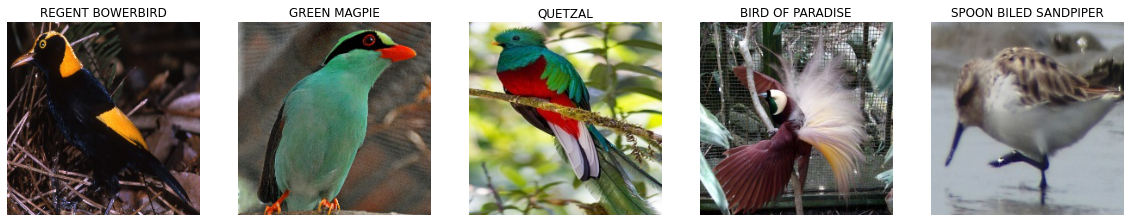

In [6]:
show_five_birds(dataset_path=dataset_path)

# Getting training and test data

In [7]:
# Defining train and test directories
train_data, test_data = get_image_data(dataset_path="sample_data/birds", IMG_SIZE = (224, 224))

Found 58388 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.


In [ ]:
# Herein we can augment our training dataset. But we will do it autoamtically in our model
# train_data_augmented, test_data = preprocess_and_augment_data(directory=dataset_path)

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


# 1. Baseline Model
Feature extraction EffecientNetB0 pre-trained on ImageNet, all layers frozen with no top layers

In [ ]:
# Setup iunput shape and baseline model
# Freeze model layers
# IMAGE_SIZE = (224, 224)
# IMAGE_SIZE = IMAGE_SIZE + (3,)

input_shape = (224, 224, 3)
baseline_model = tf.keras.applications.EfficientNetB0(include_top=False)
baseline_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
# x = data_augmentation(inputs) # Uncomment it for data augmentation

# Give basline_model the inputs (after augmentation) and don't train it
x = baseline_model(inputs, training=False)

# Pool output features of the baseline model
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

# Put a dense layer on as the output
outputs = layers.Dense(400, activation="softmax", name="output_layer")(x)

# Make a model using the inputs and outputs
model_1 = tf.keras.Model(inputs, outputs)

# Compile the mopdel
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_birds_1 = model_1.fit(train_data,
                                epochs=5,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=int(0.25*len(test_data)),
                                callbacks=[create_tensorboard_callback(dir_name="transfer_learning_birds",
                                              experiment_name="birds_baseline_model_1")])

16719872/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning_birds/birds_baseline_model_1/20220407-11
Epoch 1/5
1825/1825 [==============================] - 263s 135ms/step - loss: 1.0721 - accuracy: 0.8257 - val_loss: 0.2066 - val_accuracy: 0.9646
Epoch 2/5
1825/1825 [==============================] - 248s 136ms/step - loss: 0.2379 - accuracy: 0.9536 - val_loss: 0.0939 - val_accuracy: 0.9812
Epoch 3/5
1825/1825 [==============================] - 247s 135ms/step - loss: 0.1361 - accuracy: 0.9744 - val_loss: 0.0813 - val_accuracy: 0.9833
Epoch 4/5
1825/1825 [==============================] - 247s 135ms/step - loss: 0.0852 - accuracy: 0.9860 - val_loss: 0.0741 - val_accuracy: 0.9875
Epoch 5/5
1825/1825 [==============================] - 246s 135ms/step - loss: 0.0562 - accuracy: 0.9911 - val_loss: 0.0443 - val_accuracy: 0.9896


In [ ]:
model_1.save("model_1")

INFO:tensorflow:Assets written to: model_1/assets


In [ ]:
# Zip the model
!zip -r model_1.zip model_1



  adding: model_1/ (stored 0%)
  adding: model_1/variables/ (stored 0%)
  adding: model_1/variables/variables.index (deflated 74%)
  adding: model_1/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: model_1/assets/ (stored 0%)
  adding: model_1/saved_model.pb (deflated 91%)
  adding: model_1/keras_metadata.pb (deflated 96%)


In [ ]:
files.download('model_1.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

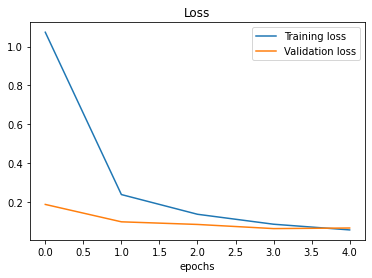

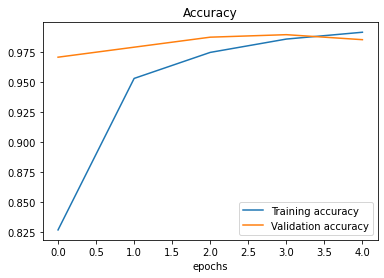

In [ ]:
# Plot loss curves
plot_loss_curves(history_birds_1)

In [ ]:
# Check which layers are trainable
for i, layer in enumerate(model_1.layers):
  print(i, layer.name, layer.trainable)

0 input_layer True
1 efficientnetb0 False
2 global_average_pooling True
3 output_layer True


In [ ]:
# Summary of our baseline model 1
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 400)               512400    
                                                                 
Total params: 4,561,971
Trainable params: 512,400
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# Evaluate on the full test dataset
model_1.evaluate(test_data)

63/63 [==============================] - 5s 77ms/step - loss: 0.0611 - accuracy: 0.9845


[0.0610649473965168, 0.984499990940094]

# 2. Baseline (as model 1) with data augmentation

### Data augmentation

In [8]:
# Adding data augmentation right into the model
from tensorflow import keras
from keras import layers
from keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomHeight, RandomWidth

# Create data augmentation stage with horisontal flipping, rotations, zooms, etc.
data_augmentation = keras.Sequential([
                    RandomFlip("horizontal"),
                    RandomRotation(0.2),
                    RandomZoom(0.2),
                    RandomHeight(0.2),
                    RandomWidth(0.2)
                    # Rescaling(1./255) # For models like ResNet50V2 but not for EffecientNet (having scaling built-in)
], name="data_augmentation")


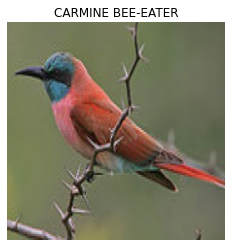

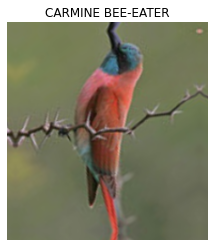

In [ ]:
# View a random image and compare it to its augmented version
target_class = random.choice(train_data.class_names)
target_dir = dataset_path + "/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
# print(random_image_path)

# Read in the random image and plot it
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"{target_class}")
plt.axis(False);

# Plotting our augmented random image
# augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
# augmented_img = tf.squeeze(augmented_img)/255.
# Please note that in TF2.8 training=True is needed for the augmentation work!
augmented_img = data_augmentation(tf.squeeze(tf.expand_dims(img, axis=0)), training=True)/255.

plt.figure()
plt.imshow(augmented_img);
plt.axis(False);
plt.title(f"{target_class}");


In [ ]:
# Setup input shape and baseline model
# Freeze model layers
input_shape = (224, 224, 3)
baseline_model = tf.keras.applications.EfficientNetB0(include_top=False)
baseline_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs) # Uncomment it for data augmentation

# Give basline_model the inputs (after augmentation) and don't train it
x = baseline_model(x, training=False)

# Pool output features of the baseline model
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

# Put a dense layer on as the output
outputs = layers.Dense(400, activation="softmax", name="output_layer")(x)

# Make a model using the inputs and outputs
model_2 = tf.keras.Model(inputs, outputs)

# Compile the mopdel
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_birds_2 = model_2.fit(train_data,
                                epochs=5,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=int(0.25*len(test_data)),
                                callbacks=[create_tensorboard_callback(dir_name="transfer_learning_birds",
                                              experiment_name="birds_baseline_data_augmentation_model_2")])

Saving TensorBoard log files to: transfer_learning_birds/birds_baseline_data_augmentation_model_2/20220407-11
Epoch 1/5
1825/1825 [==============================] - 540s 289ms/step - loss: 1.5719 - accuracy: 0.7101 - val_loss: 0.3872 - val_accuracy: 0.9333
Epoch 2/5
1825/1825 [==============================] - 365s 200ms/step - loss: 0.5739 - accuracy: 0.8682 - val_loss: 0.2271 - val_accuracy: 0.9625
Epoch 3/5
1825/1825 [==============================] - 320s 175ms/step - loss: 0.4287 - accuracy: 0.8952 - val_loss: 0.1667 - val_accuracy: 0.9625
Epoch 4/5
1825/1825 [==============================] - 299s 163ms/step - loss: 0.3496 - accuracy: 0.9126 - val_loss: 0.1438 - val_accuracy: 0.9688
Epoch 5/5
1825/1825 [==============================] - 288s 158ms/step - loss: 0.2946 - accuracy: 0.9240 - val_loss: 0.1330 - val_accuracy: 0.9667


In [ ]:
model_2.save("model_2")

INFO:tensorflow:Assets written to: model_2/assets
INFO:tensorflow:Assets written to: model_2/assets


In [ ]:
# Zip and download the model 2
!zip -r model_2.zip model_2
files.download('model_2.zip')

  adding: model_2/ (stored 0%)
  adding: model_2/variables/ (stored 0%)
  adding: model_2/variables/variables.index (deflated 74%)
  adding: model_2/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: model_2/assets/ (stored 0%)
  adding: model_2/saved_model.pb (deflated 91%)
  adding: model_2/keras_metadata.pb (deflated 96%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

updating: model_2/ (stored 0%)
updating: model_2/variables/ (stored 0%)
updating: model_2/variables/variables.index (deflated 74%)
updating: model_2/variables/variables.data-00000-of-00001 (deflated 8%)
updating: model_2/assets/ (stored 0%)
updating: model_2/saved_model.pb (deflated 91%)
updating: model_2/keras_metadata.pb (deflated 96%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

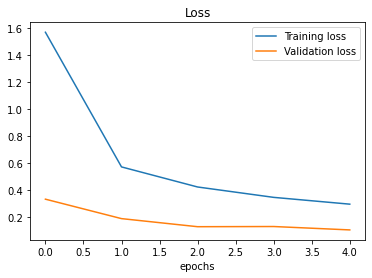

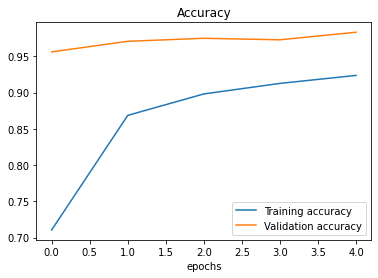

In [ ]:
# Plot loss curves
plot_loss_curves(history_birds_2)

In [ ]:
# Evaluate on the full test dataset
model_2.evaluate(test_data)

63/63 [==============================] - 5s 70ms/step - loss: 0.1209 - accuracy: 0.9690


[0.12086006253957748, 0.968999981880188]

# 3. Fine-tuned baseline with data augmentation (as model 2) with top layer trained on custom 400 Bird Species dataset, and top 10 layers unfrozen

In [ ]:
# Setup iunput shape and baseline model
# Freeze model layers
input_shape = (224, 224, 3)
baseline_model = tf.keras.applications.EfficientNetB0(include_top=False)
baseline_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give basline_model the inputs (after augmentation) and don't train it
x = baseline_model(x, training=False)

# Pool output features of the baseline model
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

# Put a dense layer on as the output
outputs = layers.Dense(400, activation="softmax", name="output_layer")(x)

# Make a model using the inputs and outputs
model_3 = keras.Model(inputs, outputs)

# Compile the mopdel
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_birds_3 = model_3.fit(train_data,
                                epochs=5,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=int(0.25*len(test_data)),
                                callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                              experiment_name="birds_baseline_data_augmentation_model_feature_extraction_3")])

16719872/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning/birds_baseline_data_augmentation_model_feature_extraction_3/20220414-11
Epoch 1/5
1476/1825 [=======================>......] - ETA: 1:44 - loss: 1.7578 - accuracy: 0.6823

In [ ]:
model_3.save("model_3_not_tuned")

INFO:tensorflow:Assets written to: model_3_not_tuned/assets


In [ ]:
# Zip and download the model 2
!zip -r model_3_not_tuned.zip model_3_not_tuned
files.download('model_3_not_tuned.zip')

  adding: model_3_not_tuned/ (stored 0%)
  adding: model_3_not_tuned/variables/ (stored 0%)
  adding: model_3_not_tuned/variables/variables.index (deflated 74%)
  adding: model_3_not_tuned/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: model_3_not_tuned/assets/ (stored 0%)
  adding: model_3_not_tuned/saved_model.pb (deflated 91%)
  adding: model_3_not_tuned/keras_metadata.pb (deflated 96%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Evaluate on the full test dataset
model_3.evaluate(test_data)

63/63 [==============================] - 9s 142ms/step - loss: 0.1234 - accuracy: 0.9705


[0.12341470271348953, 0.9704999923706055]

# Fine-tuned Model

In [ ]:
# Unfreezing the last 10 layers
baseline_model.trainable = True

# Freeze all layers except for the last 10
for layer in baseline_model.layers[:-10]:
  layer.trainable = False

# Recompile our model (we have to recompile our 
# model every time we make a change)
model_3.compile(loss="categorical_crossentropy",
                # When fine-tuning, we want to lower learning rate by 10x
                optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
# Check which layers are tunable (trainable)
for i, layer in enumerate(model_3.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
# How many trainable variables in model_3?
len(model_3.trainable_variables)

12

In [ ]:
# Fine-tune for another 5 epochs
initial_epochs = 5
fine_tune_epochs = initial_epochs +5

# Refit the model (same as model_3 except with more trainable layers)
history_model_3_fine_tuning = model_3.fit(train_data,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.25*len(test_data)),
                                                     # Starting from the last epoch where the model was previously left off
                                                     initial_epoch=history_birds_3.epoch[-1],
                                                     callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                experiment_name="fine_tuning_birds_model_3")])
                              

Saving TensorBoard log files to: transfer_learning/fine_tuning_birds_model_3/20220410-11
Epoch 5/10
1825/1825 [==============================] - 306s 163ms/step - loss: 0.2032 - accuracy: 0.9446 - val_loss: 0.0779 - val_accuracy: 0.9708
Epoch 6/10
1825/1825 [==============================] - 290s 159ms/step - loss: 0.1639 - accuracy: 0.9548 - val_loss: 0.0901 - val_accuracy: 0.9771
Epoch 7/10
1825/1825 [==============================] - 288s 157ms/step - loss: 0.1444 - accuracy: 0.9600 - val_loss: 0.0821 - val_accuracy: 0.9750
Epoch 8/10
1825/1825 [==============================] - 282s 154ms/step - loss: 0.1281 - accuracy: 0.9637 - val_loss: 0.0650 - val_accuracy: 0.9771
Epoch 9/10
1825/1825 [==============================] - 282s 154ms/step - loss: 0.1160 - accuracy: 0.9668 - val_loss: 0.0686 - val_accuracy: 0.9771
Epoch 10/10
1825/1825 [==============================] - 280s 153ms/step - loss: 0.1044 - accuracy: 0.9699 - val_loss: 0.0952 - val_accuracy: 0.9688


In [ ]:
model_3.save("model_3")

INFO:tensorflow:Assets written to: model_3/assets


In [ ]:
# Zip and download the model 3
!zip -r model_3.zip model_3
files.download('model_3.zip')

  adding: model_3/ (stored 0%)
  adding: model_3/variables/ (stored 0%)
  adding: model_3/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: model_3/variables/variables.index (deflated 74%)
  adding: model_3/assets/ (stored 0%)
  adding: model_3/keras_metadata.pb (deflated 96%)
  adding: model_3/saved_model.pb (deflated 91%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

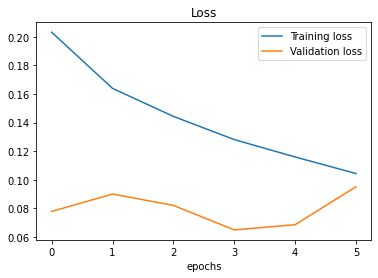

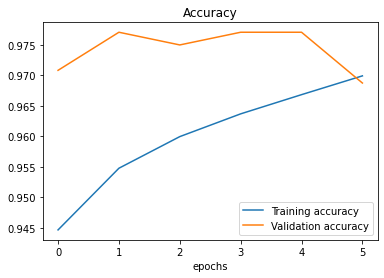

In [ ]:
plot_loss_curves(history_model_3_fine_tuning)

In [ ]:
# Evaluate the fine-tuned model_3, which is the model_2 fine-tuned for another 5 epochs
results_model_3 = model_3.evaluate(test_data)

63/63 [==============================] - 9s 136ms/step - loss: 0.0864 - accuracy: 0.9715


In [ ]:
# Let's create a function to compare training histories
def compare_histories(original_history, new_history, initial_epochs=5):
  """
  Conpares two TensorFlow History objects
  """

  # Get original history measurements
  accuracy = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_accuracy = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with new history metrics
  total_accuracy = accuracy + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  # Combine original history with new history metrics for validation tests
  total_val_accuracy = val_accuracy + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Draw plots for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_accuracy, label="Training Accuracy")
  plt.plot(total_val_accuracy, label="Validation Accuracy")

  # Plot a line where the fine-tuning started
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine-tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")


  # Draw plots for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Validation Loss")

  # Plot a line where the fine-tuning started
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine-tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

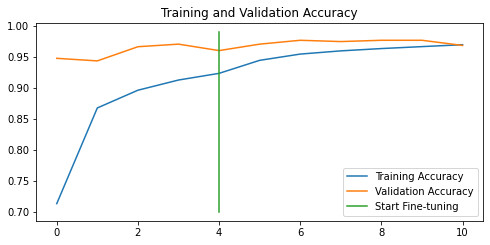

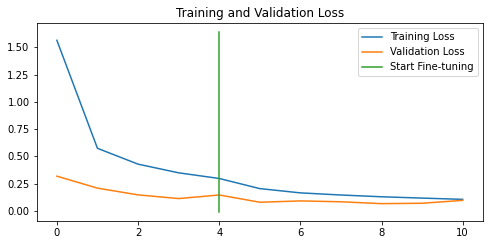

In [ ]:
compare_histories(history_birds_3, 
                  history_model_3_fine_tuning, 
                  initial_epochs=5)

In [ ]:
# Check which layers are trainable in the whole model
for layer_number, layer in enumerate(model_3.layers):
  print(layer_number, layer.name,  layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling True
4 output_layer True


We see that the efficientnteb0 is trainable. The fact is that if any layer of this layer is trainblem, it will show True for this (upper) layer.

In [ ]:
# Let's go into the baseline model (efficientnetb0) and see the trainable layers
for layer_number, layer in enumerate(model_3.layers[2].layers):
  print(layer_number, layer.name,  layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

# Additionally, Model 4!

We have observed that the data augmentation step might be not so useful with these data and models. In model 4 we build a model, similar to the model 3 without data augmentation step. The goal here is to check the model performance and conclude on the data augmentation usefulness

In [ ]:
# Setup iunput shape and baseline model
# Freeze model layers
input_shape = (224, 224, 3)
baseline_model = tf.keras.applications.EfficientNetB0(include_top=False)
baseline_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# We remove the data augmentation step in thi sexperiment
# x = data_augmentation(inputs)

# Give basline_model the inputs (after augmentation) and don't train it
x = baseline_model(inputs, training=False)

# Pool output features of the baseline model
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

# Put a dense layer on as the output
outputs = layers.Dense(400, activation="softmax", name="output_layer")(x)

# Make a model using the inputs and outputs
model_4 = keras.Model(inputs, outputs)

# Compile the mopdel
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_birds_4 = model_4.fit(train_data,
                                epochs=5,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=int(0.25*len(test_data)),
                                callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                              experiment_name="birds_baseline__feature_extraction_4")])

Saving TensorBoard log files to: transfer_learning/birds_baseline__feature_extraction_4/20220413-11
Epoch 1/5
1825/1825 [==============================] - 150s 74ms/step - loss: 1.0712 - accuracy: 0.8258 - val_loss: 0.2091 - val_accuracy: 0.9750
Epoch 2/5
1825/1825 [==============================] - 131s 72ms/step - loss: 0.2393 - accuracy: 0.9525 - val_loss: 0.1246 - val_accuracy: 0.9854
Epoch 3/5
1825/1825 [==============================] - 130s 71ms/step - loss: 0.1369 - accuracy: 0.9753 - val_loss: 0.0921 - val_accuracy: 0.9833
Epoch 4/5
1825/1825 [==============================] - 130s 71ms/step - loss: 0.0861 - accuracy: 0.9857 - val_loss: 0.0886 - val_accuracy: 0.9771
Epoch 5/5
1825/1825 [==============================] - 130s 71ms/step - loss: 0.0564 - accuracy: 0.9913 - val_loss: 0.0943 - val_accuracy: 0.9750


In [ ]:
# Unfreezing the last 100 layers
baseline_model.trainable = True

# Freeze all layers except for the last 100
for layer in baseline_model.layers[:-100]:
  layer.trainable = False

# Recompile our model (we have to recompile our 
# model every time we make a change)
model_4.compile(loss="categorical_crossentropy",
                # When fine-tuning, we want to lower learning rate by 10x
                optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
# Fine-tune for another 5 epochs
initial_epochs = 5
fine_tune_epochs = initial_epochs +5

# Refit the model (same as model_3 except with more trainable layers)
history_model_4_fine_tuning = model_4.fit(train_data,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.25*len(test_data)),
                                                     # Starting from the last epoch where the model was previously left off
                                                     initial_epoch=history_birds_4.epoch[-1],
                                                     callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                experiment_name="fine_tuning_birds_model_4")])
                              

Saving TensorBoard log files to: transfer_learning/fine_tuning_birds_model_4/20220413-11
Epoch 5/10
1825/1825 [==============================] - 213s 113ms/step - loss: 0.0453 - accuracy: 0.9879 - val_loss: 0.0992 - val_accuracy: 0.9750
Epoch 6/10
1825/1825 [==============================] - 204s 112ms/step - loss: 0.0238 - accuracy: 0.9934 - val_loss: 0.0773 - val_accuracy: 0.9792
Epoch 7/10
1825/1825 [==============================] - 205s 112ms/step - loss: 0.0180 - accuracy: 0.9948 - val_loss: 0.0782 - val_accuracy: 0.9812
Epoch 8/10
1825/1825 [==============================] - 204s 112ms/step - loss: 0.0152 - accuracy: 0.9956 - val_loss: 0.1045 - val_accuracy: 0.9708
Epoch 9/10
1825/1825 [==============================] - 205s 112ms/step - loss: 0.0148 - accuracy: 0.9959 - val_loss: 0.1122 - val_accuracy: 0.9708
Epoch 10/10
1825/1825 [==============================] - 205s 112ms/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.1034 - val_accuracy: 0.9792


In [ ]:
model_4.save("model_4")

INFO:tensorflow:Assets written to: model_4/assets


In [ ]:
# Zip and download the model 2
!zip -r model_4.zip model_4
# files.download('model_4.zip')

  adding: model_4/ (stored 0%)
  adding: model_4/keras_metadata.pb (deflated 96%)
  adding: model_4/variables/ (stored 0%)
  adding: model_4/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: model_4/variables/variables.index (deflated 77%)
  adding: model_4/saved_model.pb (deflated 91%)
  adding: model_4/assets/ (stored 0%)


63/63 [==============================] - 9s 135ms/step - loss: 0.0524 - accuracy: 0.9850
[0.05241179093718529, 0.9850000143051147]

In [ ]:
# Evaluate on the full test dataset
model_4.evaluate(test_data)

63/63 [==============================] - 5s 81ms/step - loss: 0.0608 - accuracy: 0.9835


[0.060833822935819626, 0.9835000038146973]

Previous results on 50 unfrozen layers
Saving TensorBoard log files to: transfer_learning/fine_tuning_birds_model_4/20220410-13
Epoch 5/10
1825/1825 [==============================] - 332s 176ms/step - loss: 0.0145 - accuracy: 0.9962 - val_loss: 0.0564 - val_accuracy: 0.9792
Epoch 6/10
1825/1825 [==============================] - 323s 177ms/step - loss: 0.0107 - accuracy: 0.9974 - val_loss: 0.0284 - val_accuracy: 0.9875
Epoch 7/10
1825/1825 [==============================] - 322s 176ms/step - loss: 0.0092 - accuracy: 0.9974 - val_loss: 0.0938 - val_accuracy: 0.9792
Epoch 8/10
1825/1825 [==============================] - 323s 177ms/step - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.0456 - val_accuracy: 0.9833
Epoch 9/10
1825/1825 [==============================] - 322s 176ms/step - loss: 0.0063 - accuracy: 0.9983 - val_loss: 0.0512 - val_accuracy: 0.9875
Epoch 10/10
1825/1825 [==============================] - 323s 177ms/step - loss: 0.0065 - accuracy: 0.9984 - val_loss: 0.0573 - val_accuracy: 0.9833



Evaluation on test set:

63/63 [==============================] - 9s 135ms/step - loss: 0.0524 - accuracy: 0.9850
[0.05241179093718529, 0.9850000143051147]

##### Previous results with 10 layers unfrozen
63/63 [==============================] - 9s 136ms/step - loss: 0.0537 - accuracy: 0.9845
[0.05371852591633797, 0.984499990940094]

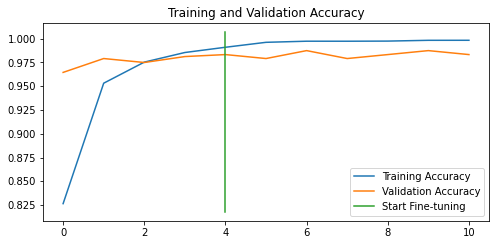

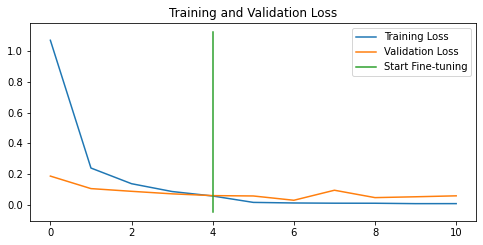

In [ ]:
compare_histories(history_birds_4, 
                  history_model_4_fine_tuning, 
                  initial_epochs=5)

# Comparing Resuls

In [ ]:
import pandas as pd

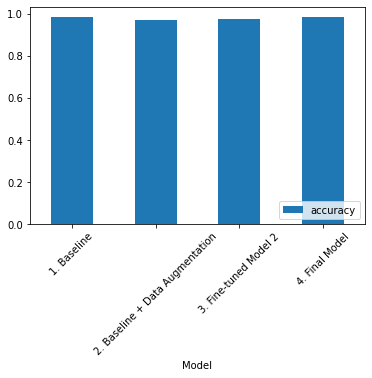

In [ ]:
import pandas as pd
df = pd.DataFrame({'Model':['1. Baseline', '2. Baseline + Data Augmentation', \
                            '3. Fine-tuned Model 2', '4. Final Model'], 
                   'accuracy':[0.9845, 0.9690, 0.9740, 0.9850]})
df.plot.bar(x='Model', y='accuracy', rot=45)
plt.legend(loc="lower right")

We see that only top 10 layers are trainable.

# Experimental results on TensorBoard

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiments with 400 Bird Species" \
  --description "A series of Transfer Learning Experiments with Feature Extraction and Fine-tuning." \
  --one_shot # Exits the uploader once its finished uploading


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=PJqRieldBsa9t7pMJVaTMTY5cMdSf4&prompt=consent&access_type=o

# Bird Predictions

In [ ]:
# Unzipping saved model
unzip_file("/content/model_4.zip")

True

In [ ]:
# Load unzipped model
loaded_model = tf.keras.models.load_model("model_4")

In [ ]:
# Evaluate the loaded model
loaded_model.evaluate(test_data)

63/63 [==============================] - 20s 146ms/step - loss: 0.0537 - accuracy: 0.9845


[0.05371851474046707, 0.984499990940094]

## Predicting Birds from the Validation Dataset




In [ ]:
# loaded_model=model_4

In [ ]:
# These two functions you find in the helpers.py
def load_and_prepare_image(filename, img_shape=224, rescale=True):
    """
    Preparing an image for image prediction task.
    Reads and reshapes the tensor into needed shape.
    Image tensor is rescaled.
    :param filename: full-path filename of the image
    :param img_shape: required shape of the output image
    :param rescale: is True when we return normalised image tensor
    :return: image tensor
    """

    # Read the image
    img = tf.io.read_file(filename)

     # Decode the image into tensorflow
    img = tf.image.decode_image(img)

    # Resize the image
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image
    if rescale:
        img = img/255.

    return img

In [ ]:
def predict_and_plot(model, filename, class_names, known_label=False, rescale=True):
    """
    Loads an image stored at filename, makes the prediction,
    plots the image with the predicted class as the title.
    :param model:  Multi-class/Binary classification model.
    :param filename: filename of the image to predict.
    :param class_names: class names of the model.
    :param known_label: if we want to compare the known
    label with the predicted label.
    :param rescale: is True when we return normalised image tensor
    :return:
    """

    # import the target image and preprocess it
    img = load_and_prepare_image(filename, rescale=rescale)

    # Make a prediction
    predicted = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    # Check for multi-class classification
    # print(predicted)
    if len(predicted[0])>1:
      predicted_class = class_names[tf.argmax(predicted[0])]
    else:
      # Binary classification
      predicted_class = class_names[int(tf.round(predicted[0]))]

    # Plot the image and predicted class
    plt.figure(figsize=(5,5))
    if rescale:
      plt.imshow(img);
    else:
      plt.imshow(img/255.);

    if known_label:
        if (known_label == predicted_class):
            plt.title(f"Predicted correctly: {predicted_class}")
        else:
            plt.title(f"{known_label } predicted as {predicted_class}")
    else:
        plt.title(f"Predicted: {predicted_class}")
    plt.axis(False)


In [ ]:
filenames = ["sample_data/birds/valid/PUFFIN/2.jpg", \
             "sample_data/birds/valid/APAPANE/3.jpg", \
             "sample_data/birds/valid/AZURE JAY/2.jpg", \
             "sample_data/birds/valid/BANANAQUIT/1.jpg"]
species = ["PUFFIN", "APAPANE", "AZURE JAY", "BANANAQUIT"]

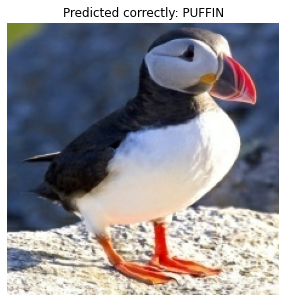

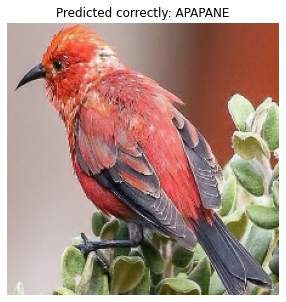

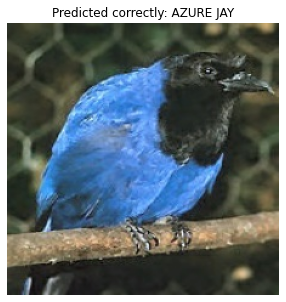

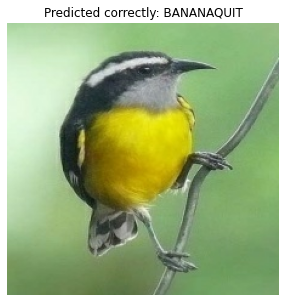

In [ ]:
for filename, name in zip(filenames, species):  
  predict_and_plot(loaded_model, filename, train_data.class_names, \
                 known_label=name, rescale=False)


# Predicting Bird Specie Using My Photo

In [11]:
# Unzipping saved model
unzip_file("/content/model_4.zip")

# Load unzipped model
loaded_model = tf.keras.models.load_model("model_4")

# Evaluate the loaded model
loaded_model.evaluate(test_data)

63/63 [==============================] - 10s 134ms/step - loss: 0.0537 - accuracy: 0.9845


[0.05371851101517677, 0.984499990940094]

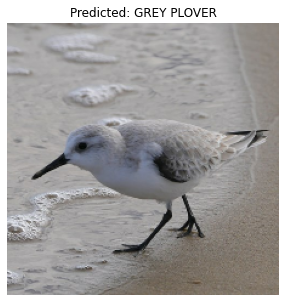

In [13]:
filename="/content/12b9df9e-b3d9-4256-902d-c2972388f8c5.jpg"
predict_and_plot(loaded_model, filename, train_data.class_names, \
                 known_label=False, rescale=False)

# Deleting Your Experiments from TensorBoard
All data there is public, and sometimes we need to delete it knowing its ID

In [ ]:
# Show a list of experiments
!tensorboard dev list

# Delete an experiment
!tensorboard dev delete --experiment_id POgjiRKlRMO2gc2malvsjw

